In [1]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# новые импорты
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [46]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Ice_cream%20selling%20data.csv')
df['Temperature (°C)'] = df['Temperature (°C)'].round(1)
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.7,41.842986
1,-4.3,34.661120
2,-4.2,39.383001
3,-3.9,37.539845
4,-3.6,32.284531


In [47]:
x = df['Temperature (°C)']
y = df["Ice Cream Sales (units)"]
res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=-0.8032795347301636, intercept=16.120062165503033, rvalue=-0.17681916109335943, pvalue=0.22421898377616492, stderr=0.6522152357675165, intercept_stderr=1.7514407399348162)


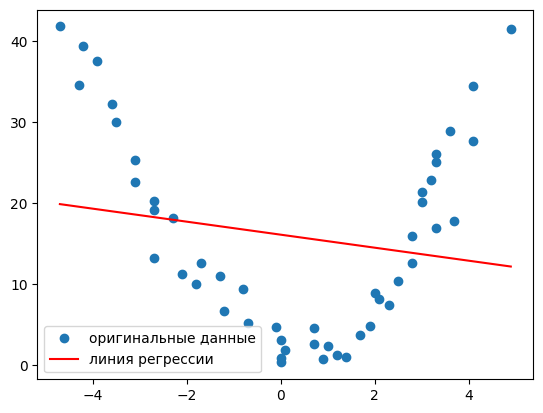

In [48]:
# функция линейной регрессии Y = a + bX

plt.plot(x, y, 'o', label='оригинальные данные')
plt.plot(x, res.intercept + res.slope*x, 'r', label='линия регрессии')
plt.legend()
# intercept - число, которое мы прибавляем в уравнении
# slope - коэффициент для х

In [49]:
print(f'R2 score: {(res.rvalue)**2}')

R2 score: 0.03126501572975939


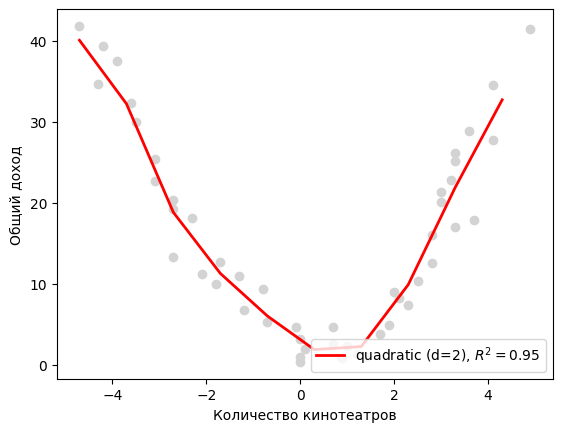

In [51]:
# подберите оптимальное количество степеней

# посмотрим на ошибки при увеличении степени
X = df[['Temperature (°C)']].values
y = df['Ice Cream Sales (units)'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree=7) # степени
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = metrics.r2_score(y, regr.predict(X_quad))


# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Количество кинотеатров')
plt.ylabel('Общий доход')
plt.legend(loc='lower right');

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_reg

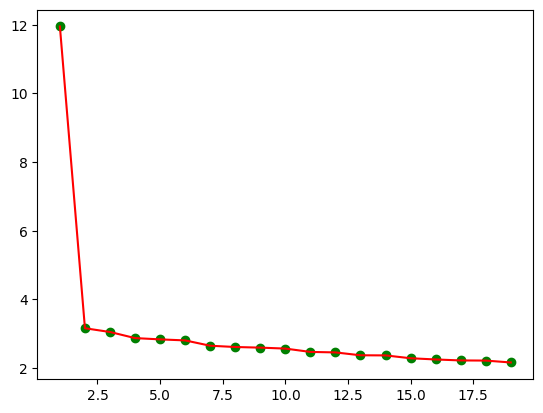

In [41]:
# посмотрим на ошибки при увеличении степени
number_degrees = range(1, 20)
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)

   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)

   plt_mean_squared_error.append(metrics.mean_squared_error(y, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")

In [ ]:
# реализуйте полиномиальную регрессию с выбранным количеством степеней

